# Preparing TPD arrest data for spatial analysis and visualizations
### Libraries

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="colorblind")

### Data Path and Relevant Parameters

In [16]:
# Tucson, AZ Police Department Arrest Data 2016-2019
arrests_csv = "../data/TPD_Arrests_2016-19.csv"
# Projection information for X,Y attributes in arrest data 
arrest_prj_info = 'epsg:2868'
# Projection information for longitude, latitude attributes
geographic_prj_info = "EPSG:4326"

### Functions

In [17]:
def prepare_data(input_csv):
    """
    Function to prepare arrest data for additional analyses and visualizations.
    
    Steps:
    * Read CSV data with pandas and store in memory as a DataFrame
    * Removes rows with null geometries from DataFrame
    * Transform time information to pandas datetime format
    * Add additional columns for month and year attributes
    * Convert pandas DataFrame to geopandas GeoDataFrame
    * Set projection to appropriate proj string
    * Calculate geographic coordinates for visualizations
    * Subset for columns of interest
    
    Returns a geopandas GeoDataFrame of point geometries
    """
    df = pd.read_csv(input_csv, low_memory=False)
    removed_null_geometries = df[(df.X > 0) & (df.Y > 0)].copy()
    removed_null_geometries["dt_info"] = pd.to_datetime(removed_null_geometries["datetime_arr"])
    removed_null_geometries["month"] = removed_null_geometries["dt_info"].dt.month
    removed_null_geometries["year"] = removed_null_geometries["dt_info"].dt.year
    gdf = gpd.GeoDataFrame(removed_null_geometries, geometry=gpd.points_from_xy(removed_null_geometries.X, removed_null_geometries.Y))
    gdf.crs = prj_info
    gdf["lat"]= gdf["geometry"].to_crs(geographic_prj_info).y
    gdf["lon"]= gdf["geometry"].to_crs(geographic_prj_info).x
    columns_of_interest = ["age","race","sex","ethnicity","arr_type","arr_chrg","chrgdesc","chrg_cnt","fel_misd","dt_info", "month", "year", "lat",'lon', "geometry"]
    return gdf[columns_of_interest]
    
    

### Run the function

In [19]:
arrests_data = prepare_data(arrests_csv)

print(arrests_data.shape)

arrests_data.head()

(265228, 15)


,age,race,sex,ethnicity,arr_type,arr_chrg,chrgdesc,chrg_cnt,fel_misd,dt_info,month,year,lat,lon,geometry
0,35,W,F,N,BK,13-2506A1,FAILURE TO APPEAR 2ND DEG (CRIM) ...,1,M,2019-01-03 19:40:00+00:00,1,2019,32.252928,-110.892557,POINT (1016592.339 457255.232)
1,24,W,M,H,BK,13-1803,UNLAWFUL USE OF MEANS OF TRANSPORTATION ...,1,F,2019-01-03 16:00:00+00:00,1,2019,32.243847,-110.975002,POINT (991133.155 453718.178)
2,27,H,M,H,FR,13-1602A1,CRIMINAL DAMAGE-DEFACE (CRIM) ...,1,M,2019-01-03 20:16:00+00:00,1,2019,32.209519,-110.980184,POINT (989639.809 441215.653)
3,35,B,M,U,BK,13-1506,BURGLARY 3RD DEGREE ...,1,F,2019-01-03 22:38:00+00:00,1,2019,32.264798,-110.972109,POINT (991960.710 461348.260)
4,24,W,M,H,BK,13-3415,DRUG PARAPHERNALIA-POSSESS/SELL/MANUFACTURE ...,1,F,2019-01-03 16:00:00+00:00,1,2019,32.243847,-110.975002,POINT (991133.155 453718.178)


### Plot results to make sure the data looks right

In [24]:
az_boundary = "https://raw.githubusercontent.com/glynnbird/usstatesgeojson/master/arizona.geojson"
az_boundary_gdf = gpd.read_file(az_boundary)
az_boundary_gdf_prj = az_boundary_gdf.to_crs(arrest_prj_info)
az_boundary_gdf_prj.head()

/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,name,abbreviation,capital,city,population,area,waterarea,landarea,houseseats,statehood,group,geometry
0,Arizona,AZ,Phoenix,Phoenix,6626624,295233,1026,294207,9,1912-02-14,US States,"POLYGON ((518395.733 2184139.412, 519577.797 2..."


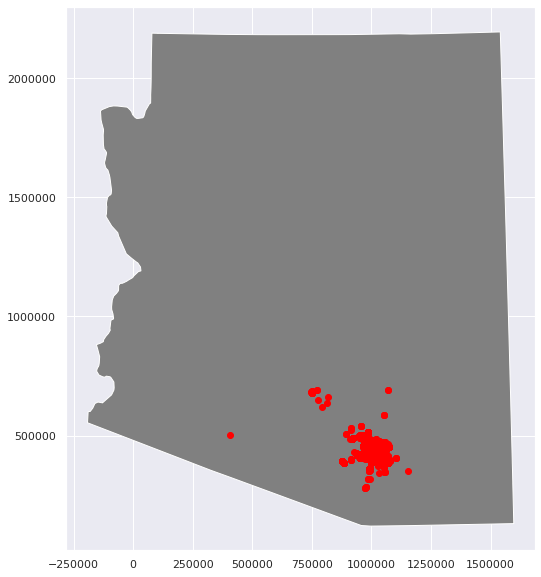

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
az_boundary_gdf_prj.plot(ax=ax, color="gray")
arrests_data.plot(ax=ax, color="red")
plt.show()

In [27]:
tucson_jurisdiction_boundaries = "https://opendata.arcgis.com/datasets/b53bbe832e4e4d94a31730b596487d28_0.geojson"
tucson_boundary_gdf = gpd.read_file(tucson_jurisdiction_boundaries)
tucson_boundary_gdf_prj = tucson_boundary_gdf.to_crs(arrest_prj_info)
tucson_boundary_gdf_prj.head()

/home/alex/anaconda3/envs/geoprocessing/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,OBJECTID,ORD,BOOK,PAGE,EFF_DATE,CITY_CD,CITY_DS,SEQ_NUM,DOC_Link,DEANNEX,PC_UID,URL,DATASOURCE,ShapeSTArea,ShapeSTLength,geometry
0,1,(O)96-38,0,0,1996-10-26T00:00:00,OV,ORO VALLEY,,http://dot.pima.gov/eim/dms/dmssearch.cfm?AppN...,N,1,https://www.tucsonaz.gov/apps/maps-and-records...,ANNEX,1.710033e+06,5233.412360,"POLYGON ((981598.166 508784.985, 982924.229 50..."
1,2,2004-11,0,0,2004-06-09T00:00:00,SAH,SAHUARITA,,http://dot.pima.gov/eim/dms/dmssearch.cfm?AppN...,N,2,https://www.tucsonaz.gov/apps/maps-and-records...,ANNEX,4.334161e+05,3109.939607,"POLYGON ((984404.908 330084.115, 984404.908 32..."
2,3,1997-02,49,0,1997-01-09T00:00:00,SAH,SAHUARITA,,http://dot.pima.gov/eim/dms/dmssearch.cfm?AppN...,N,3,https://www.tucsonaz.gov/apps/maps-and-records...,ANNEX,1.752417e+06,5295.943864,"POLYGON ((993679.321 352317.877, 993666.005 35..."
3,4,1996-01,49,19,1997-01-23T00:00:00,SAH,SAHUARITA,,http://dot.pima.gov/eim/dms/dmssearch.cfm?AppN...,N,4,https://www.tucsonaz.gov/apps/maps-and-records...,ANNEX,2.812252e+07,26610.785474,"POLYGON ((995763.849 363124.119, 995684.849 36..."
4,5,(O)89-16,31,92,1989-11-08T00:00:00,OV,ORO VALLEY,,http://dot.pima.gov/eim/dms/dmssearch.cfm?AppN...,N,5,https://www.tucsonaz.gov/apps/maps-and-records...,ANNEX,1.034462e+07,13693.331838,"POLYGON ((984331.604 506799.922, 984329.542 50..."


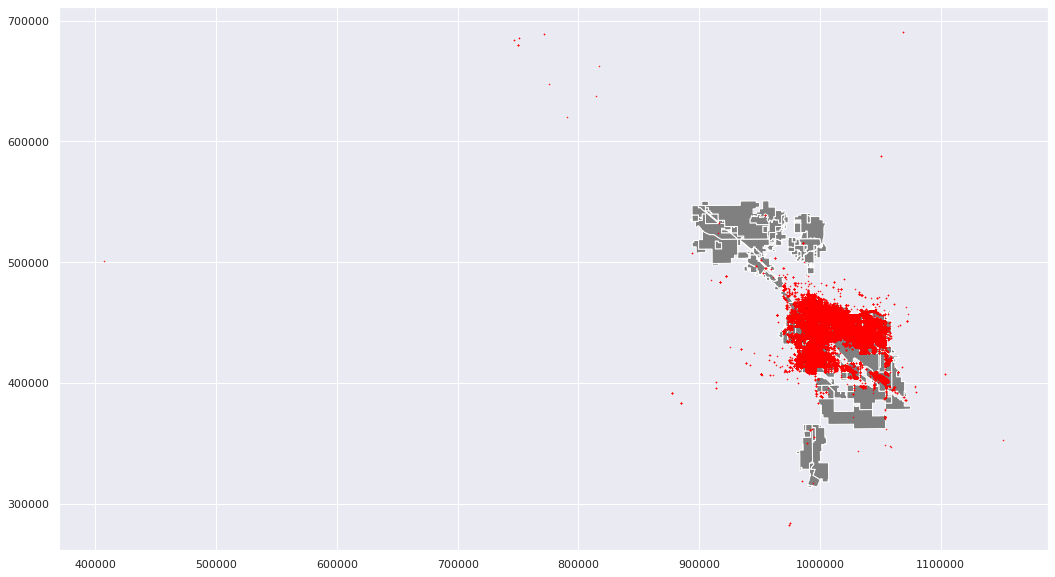

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
tucson_boundary_gdf_prj.plot(ax=ax, color="gray")
arrests_data.plot(ax=ax, color="red", markersize=0.25)
plt.show()

### Saving to CSV and GeoJSON

In [35]:
arrests_data.drop(columns="geometry").to_csv("../data/cleaned_TPD_Arrests_2016-19.csv")

In [37]:
arrests_data.to_file("../data/cleaned_TPD_Arrests_2016-19.geojson", driver="GeoJSON")